# E-Commerce Fraud Detection Model - Modeling
## Graham Miller
## GitHub Link: https://github.com/gmill88/Capstone-Miller 
## Project Description: 
Detecting and stopping E-Commerce fraud is crucial as E-Commerce con-
tinues to grow. Machine learning can be used to analyze data, identify pat-
terns, and adapt to trends to improve fraud detection [2]. This study aims to
develop a model that correctly identifies card-not-present fraud in the Kaggle
dataset,https://www.kaggle.com/datasets/vbinh002/fraud-ecommerce/data, of
simulated E-Commerce transactions, as real transactions cannot be used due to
privacy issues.

In [55]:
import pandas as pd

# Load your data
df = pd.read_csv('cleaned_data.csv')
df.head()

,user_id,purchase_value,device_id,source,browser,sex,age,ip_address,class,time_difference,unique_users_per_device
0,22058,34,QVPSPJUOCKZAR,SEO,Chrome,M,39,7.327584e+08,0,75111.366667,1
1,333320,16,EOGFQPIZPYXFZ,Ads,Chrome,F,53,3.503114e+08,0,299.066667,1
2,1359,15,YSSKYOSJHPPLJ,SEO,Opera,M,53,2.621474e+09,1,0.016667,12
3,150084,44,ATGTXKYKUDUQN,SEO,Safari,M,41,3.840542e+09,0,8201.416667,1
4,221365,39,NAUITBZFJKHWW,Ads,Safari,M,45,4.155831e+08,0,72691.016667,1


In [29]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay, accuracy_score
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, roc_auc_score
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import make_pipeline

### Logistic Regression w/no SMOTE


Training Metrics:
Accuracy: 0.91
Precision: 0.52
Recall: 0.71
F1 Score: 0.60
Confusion Matrix:
[[102155   7433]
 [  3225   8076]]
AUC Score: 0.84

Test Metrics:
Accuracy: 0.92
Precision: 0.54
Recall: 0.72
F1 Score: 0.62
Confusion Matrix:
[[25616  1757]
 [  785  2065]]
AUC Score: 0.85

Confusion Matrix Visualizations:


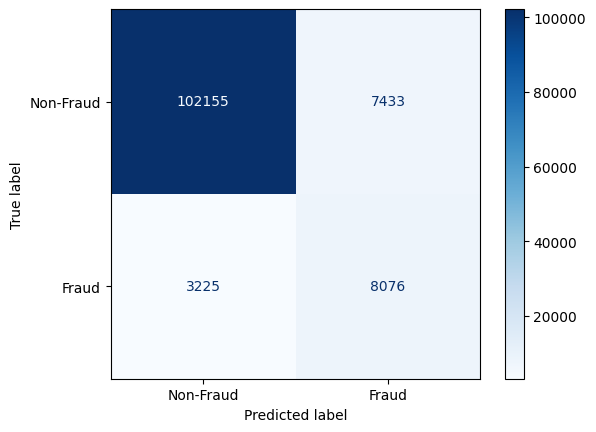

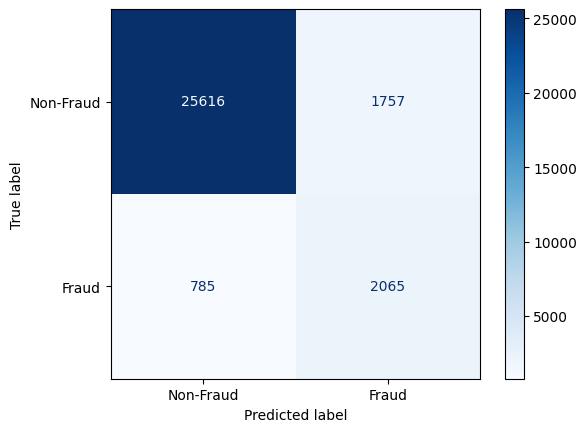

In [49]:
X = df[['time_difference', 'unique_users_per_device']]  # Select relevant features
y = df['class']  # Target variable


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

pipeline = Pipeline([
    ('scaler', StandardScaler()), 
    ('lr', LogisticRegression(class_weight='balanced'))
])

pipeline.fit(X_train, y_train)

y_train_pred = pipeline.predict(X_train)
y_test_pred = pipeline.predict(X_test)


train_accuracy = pipeline.score(X_train, y_train)
test_accuracy = pipeline.score(X_test, y_test)

train_precision = precision_score(y_train, y_train_pred)
train_recall = recall_score(y_train, y_train_pred)
train_f1 = f1_score(y_train, y_train_pred)

test_precision = precision_score(y_test, y_test_pred)
test_recall = recall_score(y_test, y_test_pred)
test_f1 = f1_score(y_test, y_test_pred)

train_cm = confusion_matrix(y_train, y_train_pred)
test_cm = confusion_matrix(y_test, y_test_pred)


y_train_prob = pipeline.predict_proba(X_train)[:, 1]  # Get probabilities for the positive class
y_test_prob = pipeline.predict_proba(X_test)[:, 1]

train_auc = roc_auc_score(y_train, y_train_prob)
test_auc = roc_auc_score(y_test, y_test_prob)

print("\nTraining Metrics:")
print(f"Accuracy: {train_accuracy:.2f}")
print(f"Precision: {train_precision:.2f}")
print(f"Recall: {train_recall:.2f}")
print(f"F1 Score: {train_f1:.2f}")
print("Confusion Matrix:")
print(train_cm)
print(f"AUC Score: {train_auc:.2f}")

print("\nTest Metrics:")
print(f"Accuracy: {test_accuracy:.2f}")
print(f"Precision: {test_precision:.2f}")
print(f"Recall: {test_recall:.2f}")
print(f"F1 Score: {test_f1:.2f}")
print("Confusion Matrix:")
print(test_cm)
print(f"AUC Score: {test_auc:.2f}")

print("\nConfusion Matrix Visualizations:")
ConfusionMatrixDisplay(confusion_matrix=train_cm, display_labels=["Non-Fraud", "Fraud"]).plot(cmap="Blues", values_format='d')
ConfusionMatrixDisplay(confusion_matrix=test_cm, display_labels=["Non-Fraud", "Fraud"]).plot(cmap="Blues", values_format='d')

### Decision Tree w/no SMOTE


Training Metrics:
Accuracy: 1.00
Precision: 1.00
Recall: 1.00
F1 Score: 1.00
Confusion Matrix:
[[109588      0]
 [     0  11301]]
AUC Score: 1.00

Test Metrics:
Accuracy: 0.92
Precision: 0.60
Recall: 0.59
F1 Score: 0.59
Confusion Matrix:
[[26262  1111]
 [ 1180  1670]]
AUC Score: 0.77

Confusion Matrix Visualizations:


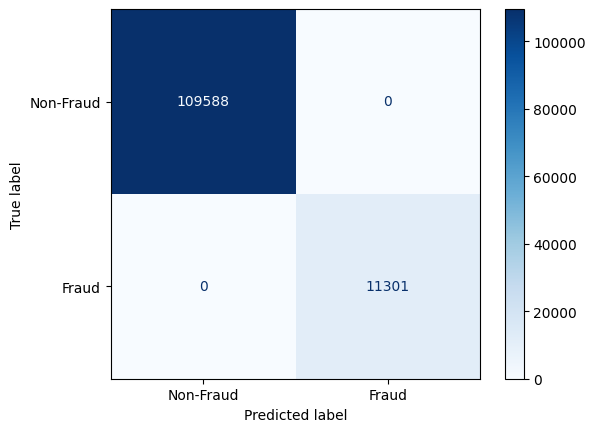

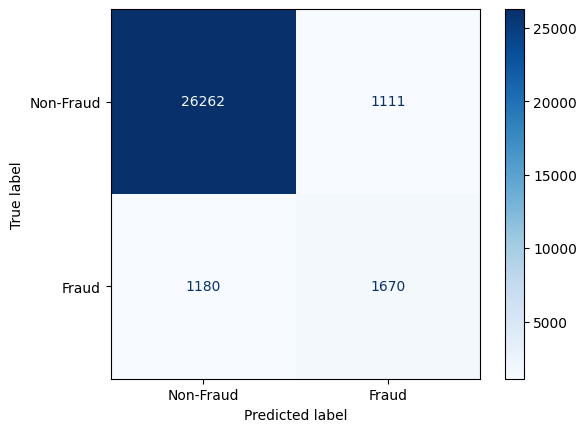

In [43]:
X = df[['time_difference', 'unique_users_per_device']]  # Select relevant features
y = df['class']  # Target variable

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('dt', DecisionTreeClassifier(class_weight='balanced', random_state=42))  
])


pipeline.fit(X_train, y_train)

y_train_pred = pipeline.predict(X_train)
y_test_pred = pipeline.predict(X_test)


train_accuracy = pipeline.score(X_train, y_train)
test_accuracy = pipeline.score(X_test, y_test)

train_precision = precision_score(y_train, y_train_pred)
train_recall = recall_score(y_train, y_train_pred)
train_f1 = f1_score(y_train, y_train_pred)

test_precision = precision_score(y_test, y_test_pred)
test_recall = recall_score(y_test, y_test_pred)
test_f1 = f1_score(y_test, y_test_pred)


train_cm = confusion_matrix(y_train, y_train_pred)
test_cm = confusion_matrix(y_test, y_test_pred)

y_train_prob = pipeline.predict_proba(X_train)[:, 1]  # Get probabilities for the positive class
y_test_prob = pipeline.predict_proba(X_test)[:, 1]

train_auc = roc_auc_score(y_train, y_train_prob)
test_auc = roc_auc_score(y_test, y_test_prob)

print("\nTraining Metrics:")
print(f"Accuracy: {train_accuracy:.2f}")
print(f"Precision: {train_precision:.2f}")
print(f"Recall: {train_recall:.2f}")
print(f"F1 Score: {train_f1:.2f}")
print("Confusion Matrix:")
print(train_cm)
print(f"AUC Score: {train_auc:.2f}")

print("\nTest Metrics:")
print(f"Accuracy: {test_accuracy:.2f}")
print(f"Precision: {test_precision:.2f}")
print(f"Recall: {test_recall:.2f}")
print(f"F1 Score: {test_f1:.2f}")
print("Confusion Matrix:")
print(test_cm)
print(f"AUC Score: {test_auc:.2f}")

print("\nConfusion Matrix Visualizations:")
ConfusionMatrixDisplay(confusion_matrix=train_cm, display_labels=["Non-Fraud", "Fraud"]).plot(cmap="Blues", values_format='d')
ConfusionMatrixDisplay(confusion_matrix=test_cm, display_labels=["Non-Fraud", "Fraud"]).plot(cmap="Blues", values_format='d')

### Gradient Boosting Classifier


Training Metrics:
Accuracy: 0.92
Precision: 0.55
Recall: 0.71
F1 Score: 0.62
Confusion Matrix:
[[102883   6685]
 [  3230   8091]]
AUC Score: 0.86

Test Metrics:
Accuracy: 0.92
Precision: 0.54
Recall: 0.71
F1 Score: 0.61
Confusion Matrix:
[[25681  1712]
 [  817  2013]]
AUC Score: 0.84


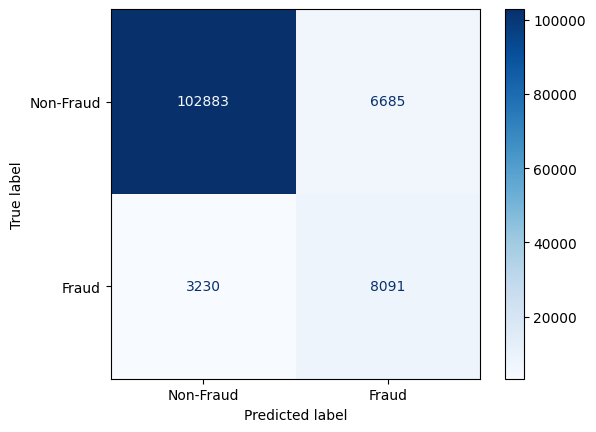

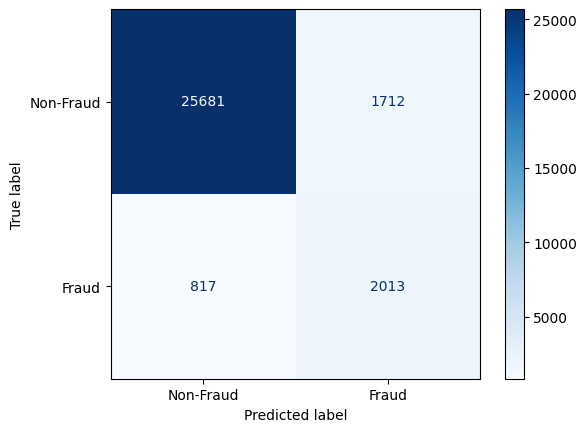

In [44]:
X = df[['time_difference', 'unique_users_per_device']]  
y = df['class'] 

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

class_weights = {0: 1, 1: len(y_train) / (2 * np.sum(y_train == 1))}

pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('classifier', GradientBoostingClassifier(random_state=42))
])

sample_weights = y_train.map(class_weights)

pipeline.fit(X_train, y_train, classifier__sample_weight=sample_weights)

y_train_pred = pipeline.predict(X_train)
y_test_pred = pipeline.predict(X_test)

y_train_prob = pipeline.predict_proba(X_train)[:, 1] 
y_test_prob = pipeline.predict_proba(X_test)[:, 1]

train_accuracy = accuracy_score(y_train, y_train_pred)
train_precision = precision_score(y_train, y_train_pred)
train_recall = recall_score(y_train, y_train_pred)
train_f1 = f1_score(y_train, y_train_pred)
train_cm = confusion_matrix(y_train, y_train_pred)
train_auc = roc_auc_score(y_train, y_train_prob)

test_accuracy = accuracy_score(y_test, y_test_pred)
test_precision = precision_score(y_test, y_test_pred)
test_recall = recall_score(y_test, y_test_pred)
test_f1 = f1_score(y_test, y_test_pred)
test_cm = confusion_matrix(y_test, y_test_pred)
test_auc = roc_auc_score(y_test, y_test_prob)


print("\nTraining Metrics:")
print(f"Accuracy: {train_accuracy:.2f}")
print(f"Precision: {train_precision:.2f}")
print(f"Recall: {train_recall:.2f}")
print(f"F1 Score: {train_f1:.2f}")
print("Confusion Matrix:")
print(train_cm)
print(f"AUC Score: {train_auc:.2f}")

print("\nTest Metrics:")
print(f"Accuracy: {test_accuracy:.2f}")
print(f"Precision: {test_precision:.2f}")
print(f"Recall: {test_recall:.2f}")
print(f"F1 Score: {test_f1:.2f}")
print("Confusion Matrix:")
print(test_cm)
print(f"AUC Score: {test_auc:.2f}")


ConfusionMatrixDisplay(confusion_matrix=train_cm, display_labels=["Non-Fraud", "Fraud"]).plot(cmap="Blues", values_format='d')
ConfusionMatrixDisplay(confusion_matrix=test_cm, display_labels=["Non-Fraud", "Fraud"]).plot(cmap="Blues", values_format='d')

### Logistic Regression With SMOTE


Training Metrics:
Accuracy: 0.95
Precision: 0.89
Recall: 0.54
F1 Score: 0.67
Confusion Matrix:
[[108807    781]
 [  5155   6146]]
AUC Score: 0.84

Test Metrics:
Accuracy: 0.95
Precision: 0.89
Recall: 0.55
F1 Score: 0.68
Confusion Matrix:
[[27178   195]
 [ 1295  1555]]
AUC Score: 0.84


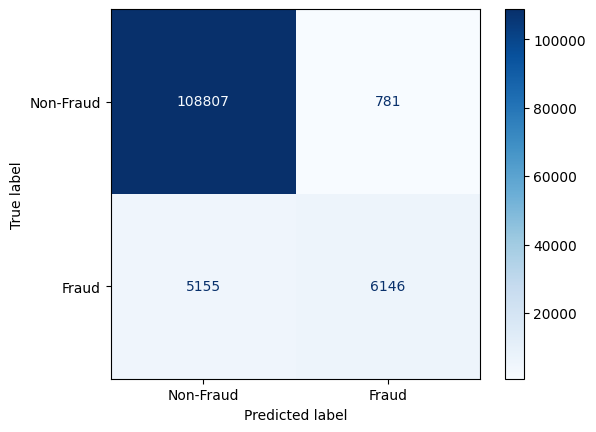

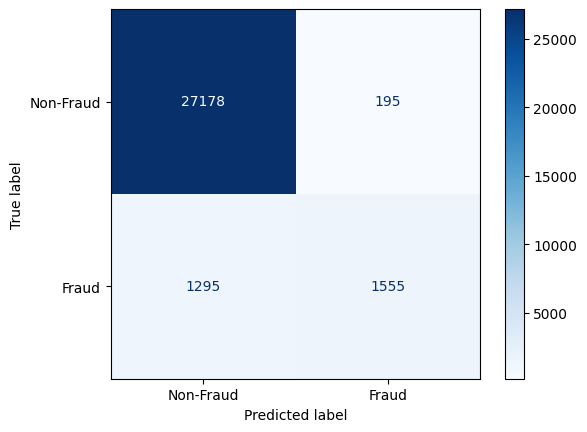

In [45]:
X = df[['time_difference', 'unique_users_per_device']]  
y = df['class'] 


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


imbalanced_pipeline = make_pipeline(
    SMOTE(random_state=42), 
    StandardScaler(),  
    LogisticRegression(class_weight='balanced')  
)


imbalanced_pipeline.fit(X_train, y_train)

y_train_pred = imbalanced_pipeline.predict(X_train)
y_test_pred = imbalanced_pipeline.predict(X_test)


train_accuracy = accuracy_score(y_train, y_train_pred)
train_precision = precision_score(y_train, y_train_pred)
train_recall = recall_score(y_train, y_train_pred)
train_f1 = f1_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)
test_precision = precision_score(y_test, y_test_pred)
test_recall = recall_score(y_test, y_test_pred)
test_f1 = f1_score(y_test, y_test_pred)

train_cm = confusion_matrix(y_train, y_train_pred)
test_cm = confusion_matrix(y_test, y_test_pred)


y_train_prob = imbalanced_pipeline.predict_proba(X_train)[:, 1]  
y_test_prob = imbalanced_pipeline.predict_proba(X_test)[:, 1]


train_auc = roc_auc_score(y_train, y_train_prob)
test_auc = roc_auc_score(y_test, y_test_prob)


print("\nTraining Metrics:")
print(f"Accuracy: {train_accuracy:.2f}")
print(f"Precision: {train_precision:.2f}")
print(f"Recall: {train_recall:.2f}")
print(f"F1 Score: {train_f1:.2f}")
print("Confusion Matrix:")
print(train_cm)
print(f"AUC Score: {train_auc:.2f}")

print("\nTest Metrics:")
print(f"Accuracy: {test_accuracy:.2f}")
print(f"Precision: {test_precision:.2f}")
print(f"Recall: {test_recall:.2f}")
print(f"F1 Score: {test_f1:.2f}")
print("Confusion Matrix:")
print(test_cm)
print(f"AUC Score: {test_auc:.2f}")


ConfusionMatrixDisplay(confusion_matrix=train_cm, display_labels=["Non-Fraud", "Fraud"]).plot(cmap="Blues", values_format='d')
ConfusionMatrixDisplay(confusion_matrix=test_cm, display_labels=["Non-Fraud", "Fraud"]).plot(cmap="Blues", values_format='d')

### Decision Tree w/SMOTE


Training Metrics:
Accuracy: 1.00
Precision: 1.00
Recall: 1.00
F1 Score: 1.00
Confusion Matrix:
[[109585      3]
 [     0  11301]]
AUC Score: 1.00

Test Metrics:
Accuracy: 0.75
Precision: 0.22
Recall: 0.66
F1 Score: 0.33
Confusion Matrix:
[[20776  6597]
 [  964  1886]]
AUC Score: 0.71


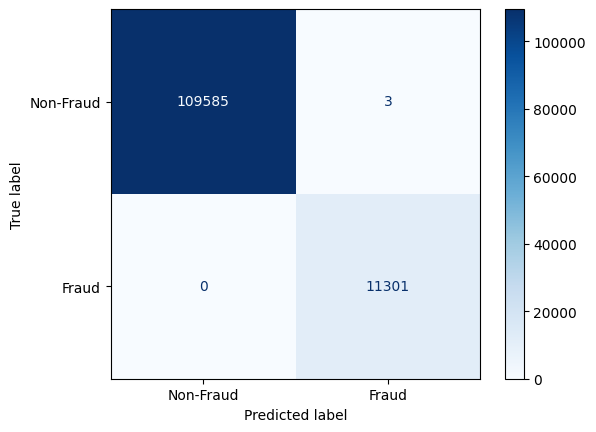

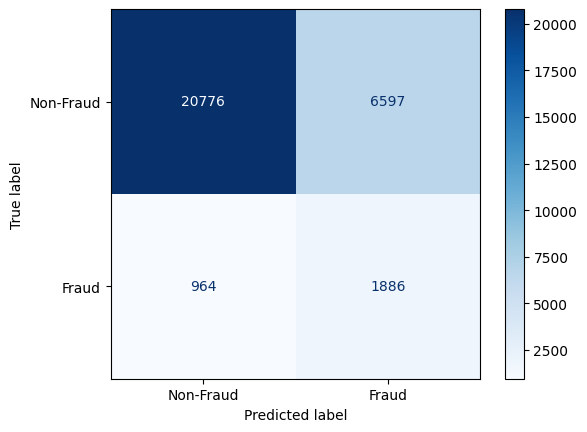

In [46]:
X = df[['time_difference', 'unique_users_per_device']]  
y = df['class'] 


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


imbalanced_pipeline = make_pipeline(
    SMOTE(random_state=42),  
    StandardScaler(), 
    DecisionTreeClassifier(class_weight='balanced', random_state=42)  
)

imbalanced_pipeline.fit(X_train, y_train)

y_train_pred = imbalanced_pipeline.predict(X_train)
y_test_pred = imbalanced_pipeline.predict(X_test)


train_accuracy = accuracy_score(y_train, y_train_pred)
train_precision = precision_score(y_train, y_train_pred)
train_recall = recall_score(y_train, y_train_pred)
train_f1 = f1_score(y_train, y_train_pred)
train_cm = confusion_matrix(y_train, y_train_pred)

test_accuracy = accuracy_score(y_test, y_test_pred)
test_precision = precision_score(y_test, y_test_pred)
test_recall = recall_score(y_test, y_test_pred)
test_f1 = f1_score(y_test, y_test_pred)
test_cm = confusion_matrix(y_test, y_test_pred)


y_train_prob = imbalanced_pipeline.predict_proba(X_train)[:, 1] 
y_test_prob = imbalanced_pipeline.predict_proba(X_test)[:, 1]


train_auc = roc_auc_score(y_train, y_train_prob)
test_auc = roc_auc_score(y_test, y_test_prob)


print("\nTraining Metrics:")
print(f"Accuracy: {train_accuracy:.2f}")
print(f"Precision: {train_precision:.2f}")
print(f"Recall: {train_recall:.2f}")
print(f"F1 Score: {train_f1:.2f}")
print("Confusion Matrix:")
print(train_cm)
print(f"AUC Score: {train_auc:.2f}")

print("\nTest Metrics:")
print(f"Accuracy: {test_accuracy:.2f}")
print(f"Precision: {test_precision:.2f}")
print(f"Recall: {test_recall:.2f}")
print(f"F1 Score: {test_f1:.2f}")
print("Confusion Matrix:")
print(test_cm)
print(f"AUC Score: {test_auc:.2f}")


ConfusionMatrixDisplay(confusion_matrix=train_cm, display_labels=["Non-Fraud", "Fraud"]).plot(cmap="Blues", values_format='d')
ConfusionMatrixDisplay(confusion_matrix=test_cm, display_labels=["Non-Fraud", "Fraud"]).plot(cmap="Blues", values_format='d')

### Random Forest W/O SMOTE


Training Metrics:
Accuracy: 1.00
Precision: 1.00
Recall: 1.00
F1 Score: 1.00
Confusion Matrix:
[[109567      1]
 [    13  11308]]
AUC Score: 1.00

Test Metrics:
Accuracy: 0.92
Precision: 0.58
Recall: 0.58
F1 Score: 0.58
Confusion Matrix:
[[26211  1182]
 [ 1185  1645]]
AUC Score: 0.81


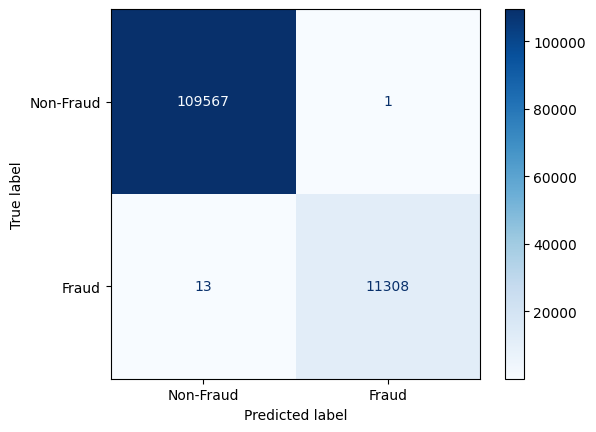

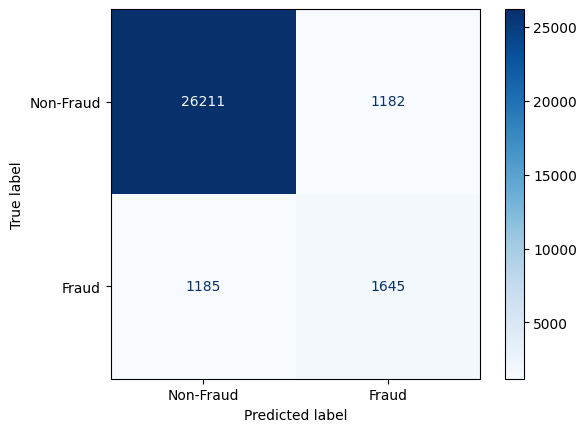

In [47]:
X = df[['time_difference', 'unique_users_per_device']]  
y = df['class']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)


pipeline = make_pipeline(
    StandardScaler(), 
    RandomForestClassifier(class_weight='balanced', random_state=42)  
)


pipeline.fit(X_train, y_train)


y_train_pred = pipeline.predict(X_train)
y_test_pred = pipeline.predict(X_test)


train_accuracy = accuracy_score(y_train, y_train_pred)
train_precision = precision_score(y_train, y_train_pred)
train_recall = recall_score(y_train, y_train_pred)
train_f1 = f1_score(y_train, y_train_pred)
train_cm = confusion_matrix(y_train, y_train_pred)


test_accuracy = accuracy_score(y_test, y_test_pred)
test_precision = precision_score(y_test, y_test_pred)
test_recall = recall_score(y_test, y_test_pred)
test_f1 = f1_score(y_test, y_test_pred)
test_cm = confusion_matrix(y_test, y_test_pred)

y_train_prob = pipeline.predict_proba(X_train)[:, 1]  
y_test_prob = pipeline.predict_proba(X_test)[:, 1]


train_auc = roc_auc_score(y_train, y_train_prob)
test_auc = roc_auc_score(y_test, y_test_prob)

print("\nTraining Metrics:")
print(f"Accuracy: {train_accuracy:.2f}")
print(f"Precision: {train_precision:.2f}")
print(f"Recall: {train_recall:.2f}")
print(f"F1 Score: {train_f1:.2f}")
print("Confusion Matrix:")
print(train_cm)
print(f"AUC Score: {train_auc:.2f}")

print("\nTest Metrics:")
print(f"Accuracy: {test_accuracy:.2f}")
print(f"Precision: {test_precision:.2f}")
print(f"Recall: {test_recall:.2f}")
print(f"F1 Score: {test_f1:.2f}")
print("Confusion Matrix:")
print(test_cm)
print(f"AUC Score: {test_auc:.2f}")


ConfusionMatrixDisplay(confusion_matrix=train_cm, display_labels=["Non-Fraud", "Fraud"]).plot(cmap="Blues", values_format='d')
ConfusionMatrixDisplay(confusion_matrix=test_cm, display_labels=["Non-Fraud", "Fraud"]).plot(cmap="Blues", values_format='d')

### Random Forest Classifier w/SMOTE


Training Metrics:
Accuracy: 1.00
Precision: 0.99
Recall: 1.00
F1 Score: 0.99
Confusion Matrix:
[[109400    168]
 [     6  11315]]
AUC Score: 1.00

Test Metrics:
Accuracy: 0.75
Precision: 0.22
Recall: 0.67
F1 Score: 0.33
Confusion Matrix:
[[20751  6642]
 [  941  1889]]
AUC Score: 0.78


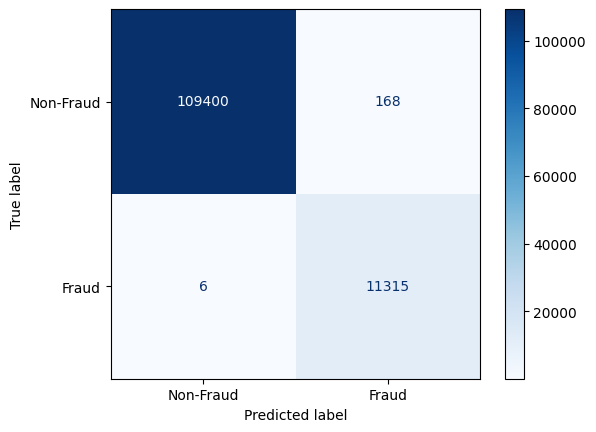

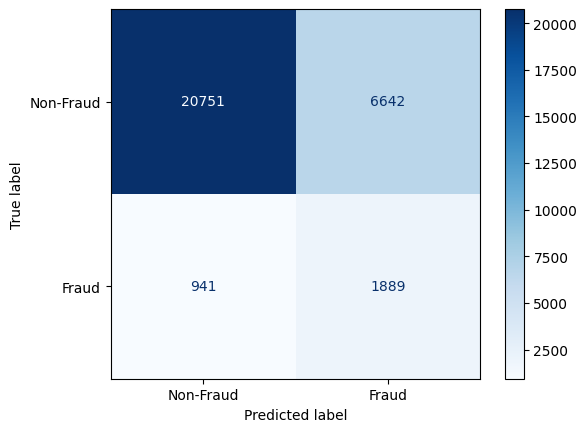

In [48]:
X = df[['time_difference', 'unique_users_per_device']]  
y = df['class']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)


pipeline = make_pipeline(
    SMOTE(random_state=42),  
    StandardScaler(), 
    RandomForestClassifier(class_weight='balanced', random_state=42)  
)


pipeline.fit(X_train, y_train)


y_train_pred = pipeline.predict(X_train)
y_test_pred = pipeline.predict(X_test)


train_accuracy = accuracy_score(y_train, y_train_pred)
train_precision = precision_score(y_train, y_train_pred)
train_recall = recall_score(y_train, y_train_pred)
train_f1 = f1_score(y_train, y_train_pred)
train_cm = confusion_matrix(y_train, y_train_pred)


test_accuracy = accuracy_score(y_test, y_test_pred)
test_precision = precision_score(y_test, y_test_pred)
test_recall = recall_score(y_test, y_test_pred)
test_f1 = f1_score(y_test, y_test_pred)
test_cm = confusion_matrix(y_test, y_test_pred)


y_train_prob = pipeline.predict_proba(X_train)[:, 1]  
y_test_prob = pipeline.predict_proba(X_test)[:, 1]


train_auc = roc_auc_score(y_train, y_train_prob)
test_auc = roc_auc_score(y_test, y_test_prob)


print("\nTraining Metrics:")
print(f"Accuracy: {train_accuracy:.2f}")
print(f"Precision: {train_precision:.2f}")
print(f"Recall: {train_recall:.2f}")
print(f"F1 Score: {train_f1:.2f}")
print("Confusion Matrix:")
print(train_cm)
print(f"AUC Score: {train_auc:.2f}")

print("\nTest Metrics:")
print(f"Accuracy: {test_accuracy:.2f}")
print(f"Precision: {test_precision:.2f}")
print(f"Recall: {test_recall:.2f}")
print(f"F1 Score: {test_f1:.2f}")
print("Confusion Matrix:")
print(test_cm)
print(f"AUC Score: {test_auc:.2f}")

ConfusionMatrixDisplay(confusion_matrix=train_cm, display_labels=["Non-Fraud", "Fraud"]).plot(cmap="Blues", values_format='d')
ConfusionMatrixDisplay(confusion_matrix=test_cm, display_labels=["Non-Fraud", "Fraud"]).plot(cmap="Blues", values_format='d')

| Model                          | Train Accuracy | Train Precision | Train Recall | Train F1 Score | Test Accuracy | Test Precision | Test Recall | Test F1 Score | Train AUC Score
|---------------------------------|----------------|-----------------|--------------|----------------|---------------|----------------|-------------|---------------|----------------|
| Logistic Regression            | 0.91           | 0.52            | 0.71         | 0.60           | 0.92          | 0.54           | 0.72        | 0..62          | 0.85            |
| Decision Tree Classifier       | 1.00           | 1.00            | 1.00         | 1.00           | 0.92          | 0.60           | 0.59        | 0.59          | 0.77            |
| Gradient Boosting Classifier   | 0.92          | 0.55            | 0.71          | 0.62           | 0.92          | 0.54           | 0.71        | 0.61          | 0.84            |
| Logistic Regression w/SMOTE    | 0.95           | 0.89            | 0.54         | 0.67           | 0.95          | 0.89           | 0.55        | 0.68          | 0.84            |
| Decision Tree w/SMOTE          | 1.00           | 1.00            | 1.00         | 1.00           | 0.75          | 0.22           | 0.66        | 0.33          | 0.71            |
| Random Forest Classifier | 1.00       | 1.00      | 1.00    | 1.00        | 0.92     | 0.58       | 0.58     | 0.58      | 0.81       |
| Random Forest Classifier w/SMOTE          | 1.00           | 1.00            | 1.00         | 1.00           | 0.75          | 0.22           | 0.66        | 0.33          | 0.78 |

The figure includes all training and test metrics for each model that wasevaluated. Since the E-Commerce Fraud data is unbalanced, SMOTE was used with compatible models to determine if SMOTE helped better predict the minority class (fraud). SMOTE oversamples the minority class, in an attempt to increase recall and F1 score. Based on the figure, most of the models had good accuracy numbers when working with the test data. The Decision Tree Classifier with SMOTE and Random Forest Classifier with SMOTE models however may have over fit the data in the training portion as accuracy dropped from 100% on training data to 75% on testing data. The models under performing in accuracy are taken out of consideration for model selection. While accuracy is important, it should not be the only metric to evaluate models with. The dataset is imbalanced nearly 90% non-fraud to 10% fraud, so if the model were to predict the majority class (non-fraud) every time the model would be expected to be 90% accurate. Area under the ROC curve is another metric used to evaluate the models. AUC can be used to determine the models ability to distinguish between the classes fraud and non-fraud. The Logistic Regression, Gradient Boosting Classifier, and Logistic Regression with SMOTE performed the best and had AUC scores of 0.85, 0.84, and 0.84 respectively. These models will be further evaluated to determine which is best for fraud detection.

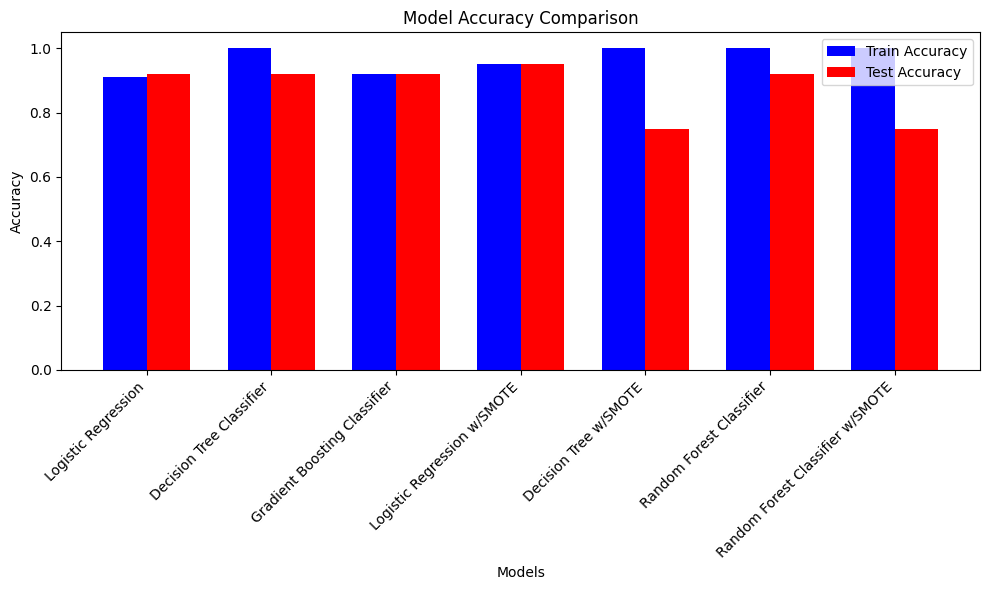

In [50]:
import matplotlib.pyplot as plt


models = [
    'Logistic Regression', 
    'Decision Tree Classifier', 
    'Gradient Boosting Classifier',
    'Logistic Regression w/SMOTE', 
    'Decision Tree w/SMOTE', 
    'Random Forest Classifier', 
    'Random Forest Classifier w/SMOTE'
]

train_accuracies = [0.91, 1.00, 0.92, 0.95, 1.00, 1.00, 1.00]
test_accuracies = [0.92, 0.92, 0.92, 0.95, 0.75, 0.92, 0.75]


fig, ax = plt.subplots(figsize=(10, 6))

bar_width = 0.35
index = range(len(models))


bar1 = ax.bar(index, train_accuracies, bar_width, label='Train Accuracy', color='b')
bar2 = ax.bar([i + bar_width for i in index], test_accuracies, bar_width, label='Test Accuracy', color='r')


ax.set_xlabel('Models')
ax.set_ylabel('Accuracy')
ax.set_title('Model Accuracy Comparison')
ax.set_xticks([i + bar_width / 2 for i in index])
ax.set_xticklabels(models, rotation=45, ha="right")
ax.legend()


plt.tight_layout()
plt.show()

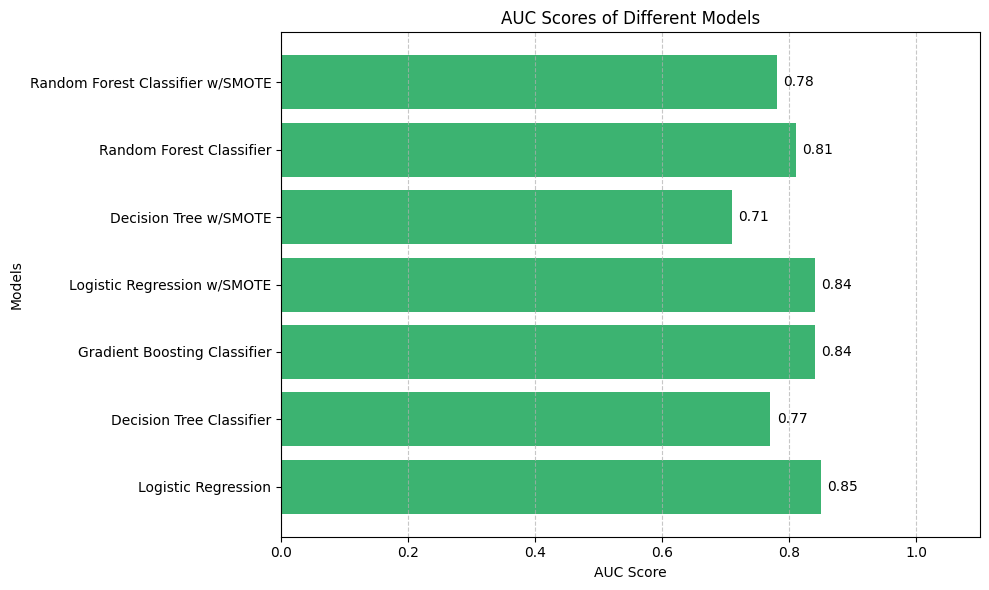

In [51]:
import matplotlib.pyplot as plt
import numpy as np

models = [
    "Logistic Regression",
    "Decision Tree Classifier",
    "Gradient Boosting Classifier",
    "Logistic Regression w/SMOTE",
    "Decision Tree w/SMOTE",
    "Random Forest Classifier",
    "Random Forest Classifier w/SMOTE"
]
auc_scores = [0.85, 0.77, 0.84, 0.84, 0.71, 0.81, 0.78]


plt.figure(figsize=(10, 6))
bars = plt.barh(models, auc_scores, color='mediumseagreen')


for bar in bars:
    plt.text(bar.get_width() + 0.01, bar.get_y() + bar.get_height()/2, f"{bar.get_width():.2f}", va='center', fontsize=10)


plt.xlabel("AUC Score")
plt.ylabel("Models")
plt.title("AUC Scores of Different Models")
plt.xlim(0, 1.1)  
plt.grid(axis='x', linestyle='--', alpha=0.7)


plt.tight_layout()
plt.show()

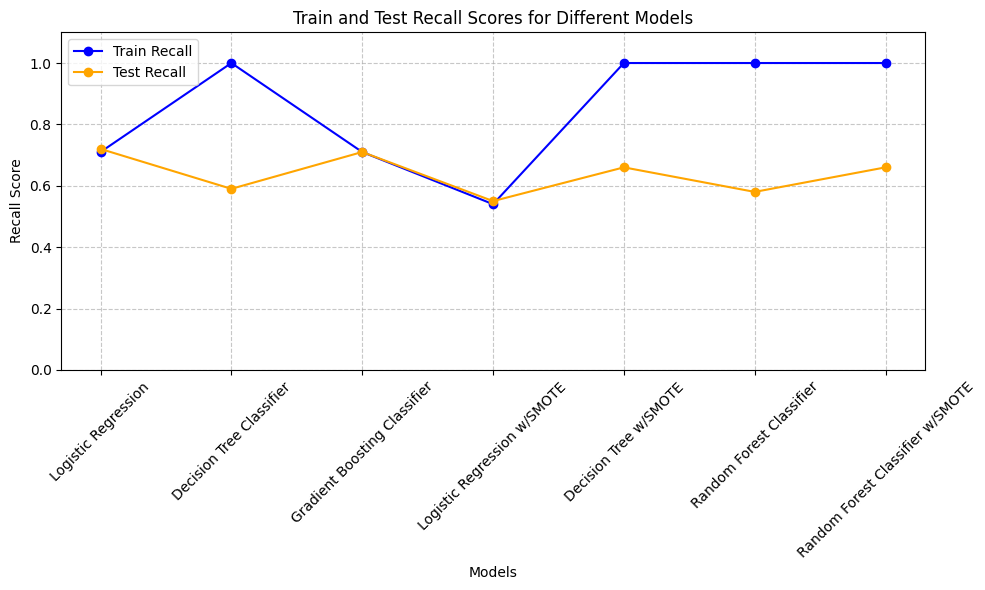

In [52]:
import matplotlib.pyplot as plt


models = [
    'Logistic Regression', 
    'Decision Tree Classifier', 
    'Gradient Boosting Classifier',  
    'Logistic Regression w/SMOTE',
    'Decision Tree w/SMOTE', 
    'Random Forest Classifier', 
    'Random Forest Classifier w/SMOTE'
]


train_recall = [0.71, 1.00, 0.71, 0.54, 1.00, 1.00, 1.00]
test_recall = [0.72, 0.59, 0.71, 0.55, 0.66, 0.58, 0.66]


plt.figure(figsize=(10, 6))
plt.plot(models, train_recall, marker='o', label="Train Recall", color="blue")
plt.plot(models, test_recall, marker='o', label="Test Recall", color="orange")


plt.xlabel("Models")
plt.ylabel("Recall Score")
plt.title("Train and Test Recall Scores for Different Models")
plt.ylim(0, 1.1)  
plt.xticks(rotation=45) 
plt.legend()


plt.grid(True, linestyle="--", alpha=0.7)
plt.tight_layout() 
plt.show()

The Figure contains a line plot that shows the difference between train and test recall for each of the models evaluated. Recall is possibly the most important metric for a model identifying fraud, as it represents the models ability to correctly identify transactions that were actually fraudulent.

1. Logistic Regression and Gradient Boosting Classifier: Had the highest recall on the test data without over fitting. These models performed equally well on training and test data, showcasing these models ability to generalize to the data.
2. Logistic Regression w/SMOTE: Had lower recall scores in comparison to other models in both training and testing, but it maintained similar scores for both. This indicates that while the model didn’t perform the best, it did not overfit the data.
3. Decision Tree Classifier, Decision Tree w/SMOTE, Random Forest Classifier, and Random Forest Classifier w/SMOTE: All extremely over fit the data. The models had perfect recall during training (1.0), but test recall dropped around 40 points for each model. These models seem to memorize training data well, but are unable to generalize to new data.

In conclusion, the Logistic Regression and Gradient Boosting Classifier models are best for identifying fraud in terms of their recall scores. These models had the highest recall scores and were able to generalize to the data. Overfitting E-Commerce Fraud Detection 19 models like the Decision Tree Classifier and Random Forest Classifier, even using SMOTE should be avoided.

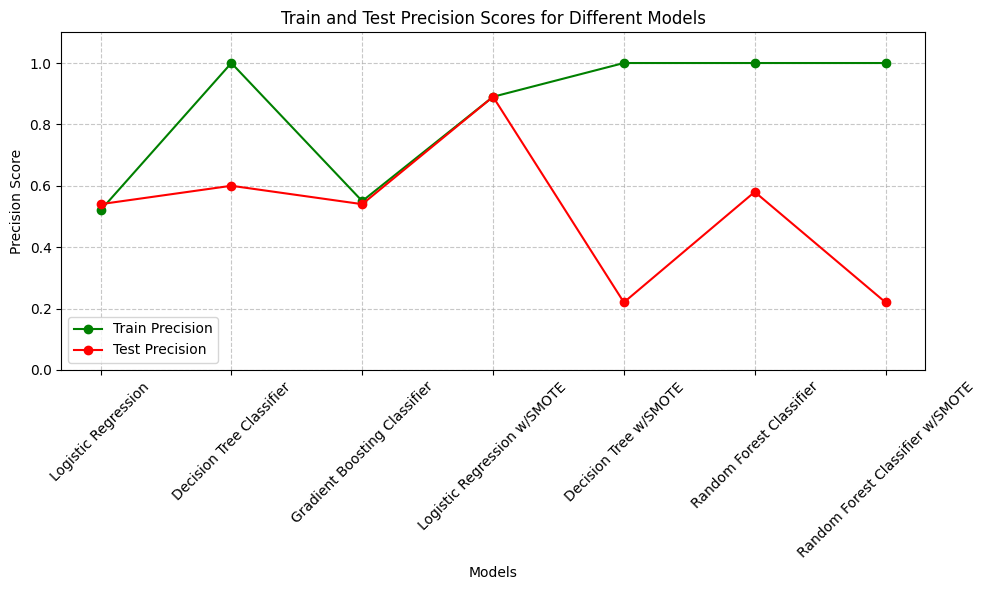

In [53]:
import matplotlib.pyplot as plt

models = [
    'Logistic Regression', 
    'Decision Tree Classifier', 
    'Gradient Boosting Classifier',
    'Logistic Regression w/SMOTE', 
    'Decision Tree w/SMOTE', 
    'Random Forest Classifier', 
    'Random Forest Classifier w/SMOTE'
]


train_precision = [0.52, 1.00, 0.55, 0.89, 1.00, 1.00, 1.00]
test_precision = [0.54, 0.60, 0.54, 0.89, 0.22, 0.58, 0.22]


plt.figure(figsize=(10, 6))
plt.plot(models, train_precision, marker='o', label="Train Precision", color="green")
plt.plot(models, test_precision, marker='o', label="Test Precision", color="red")
plt.xlabel("Models")
plt.ylabel("Precision Score")
plt.title("Train and Test Precision Scores for Different Models")
plt.ylim(0, 1.1)
plt.xticks(rotation=45)
plt.legend()
plt.grid(True, linestyle="--", alpha=0.7)
plt.tight_layout()
plt.show()

This figure illustrates a line plot comparing the train and test precision scores for each model. Precision is a critical metric for fraud detection, as it measures the proportion of predicted fraudulent transactions that are actually fraudulent. High precision reduces false positives, ensuring legitimate transactions are not flagged incorrectly.
1. Logistic Regression w/SMOTE: Achieved the highest precision on both training and testing datasets among all the models. This indicates the models ability to effectively identify fraudulent transactions with minimal false positives.
2. Logistic Regression and Gradient Boosting Classifier: Performed well in terms of balanced train and test precision but had lower precision than Logistic Regression w/SMOTE. These models still generalize well, making them reasonable choices.
3.  Decision Tree Classifier, Decision Tree w/SMOTE, Random Forest Classifier, and Random Forest Classifier w/SMOTE: Models showed overfitting, with perfect precision on the training data but large drops in test precision. This overfitting decreases their reliability for fraud detection.
4. Decision Tree w/SMOTE and Random Forest Classifier w/SMOTE: Models performed particularly poorly on test precision, suggesting that SMOTE could be leading to overfitting of these models to the data.

In conclusion, Logistic Regression w/SMOTE emerges as the top-performing model in terms of precision, making it an excellent choice for minimizing false positives in fraud detection. The Logistic Regression and Gradient Boosting Classifier should also be considered depending on how well they perform in other metrics

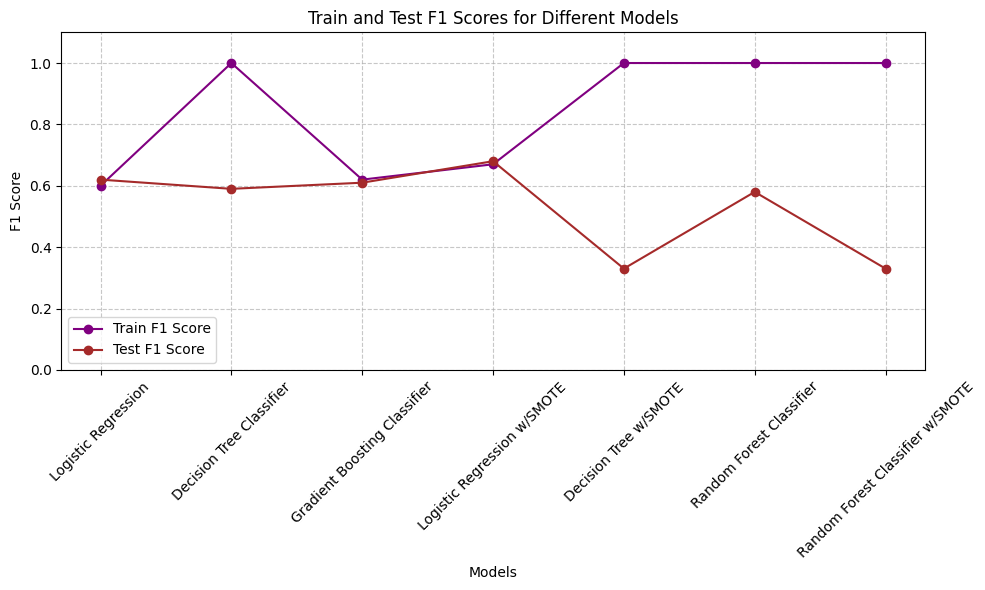

In [54]:
import matplotlib.pyplot as plt


models = [
    'Logistic Regression', 
    'Decision Tree Classifier', 
    'Gradient Boosting Classifier',
    'Logistic Regression w/SMOTE', 
    'Decision Tree w/SMOTE', 
    'Random Forest Classifier', 
    'Random Forest Classifier w/SMOTE'
]

train_f1 = [0.60, 1.00, 0.62, 0.67, 1.00, 1.00, 1.00]
test_f1 = [0.62, 0.59, 0.61, 0.68, 0.33, 0.58, 0.33]

plt.figure(figsize=(10, 6))
plt.plot(models, train_f1, marker='o', label="Train F1 Score", color="purple")
plt.plot(models, test_f1, marker='o', label="Test F1 Score", color="brown")
plt.xlabel("Models")
plt.ylabel("F1 Score")
plt.title("Train and Test F1 Scores for Different Models")
plt.ylim(0, 1.1)
plt.xticks(rotation=45)
plt.legend()
plt.grid(True, linestyle="--", alpha=0.7)
plt.tight_layout()
plt.show()

This figure illustrates a line plot comparing the train and test F1 scores for each model. The F1 score, which balances precision and recall, is a critical meric for fraud detection as it ensures both accurate identification of fraudulent transactions and minimal false negatives.
1. Logistic Regression w/SMOTE: Achieved consistent and balanced F1 scores for both training (0.67) and testing (0.68) datasets, making it the best-performing model overall. This indicates its ability to effectively detect fraudulent transactions while maintaining good generalization to unseen data.
2. Logistic Regression and Gradient Boosting Classifier: Both models demonstrated stable train and test F1 scores, although slightly lower than Logistic Regression w/SMOTE. These models generalize well and are reliable options for fraud detection.
3. Decision Tree Classifier, Decision Tree w/SMOTE, Random Forest Classifier, and Random Forest Classifier w/SMOTE: These models exhibited overfitting, having perfect or near-perfect F1 scores on the training data but significantly lower scores on the test data. This performance drop decreases their reliability for real-world applications.
4. Random Forest Classifier w/SMOTE and Decision Tree w/SMOTE: Performed poorly on test F1 scores, suggesting that the application of SMOTE may have led to overfitting, particularly with these models.

In conclusion, Logistic Regression w/SMOTE is the top-performing model for fraud detection based on F1 score, effectively balancing the trade-off between false positives and false negatives. Logistic Regression and Gradient Boosting Classifier are also strong candidates, particularly for scenarios where model generalization is a priority.